# **Breast Cancer Prediction**

### Dự án bệnh ung thư vú

*Language used: English*

*Author: Hoang Anh Tuan*

*Type: Data Science*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## **Data Import and Initial View**

In [3]:
# Importing Data
link = 'https://drive.google.com/file/d/1TttM2KZpN0AO4PHtsNuf74JPHvXd8a2z/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
cancer_df = pd.read_csv(path)

In [4]:
# First View
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**There are 31 features coloumns and 1 target column on this dataset. And there are total 569 records of 569 different samples with a wide diversity of symptoms.**

**Target column: "diagnosis"**

##**Data Cleaning and Preprocessing**

In [5]:
# Show information
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**It seems like the data is already very clean, all columns are at its correct data type at this point.**

In [6]:
# Description for numeric columns
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Check for NULL
cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**This dataset has no missing values on any columns at all**

In [8]:
# Check for duplicates excluding the "ID" column
duplicates = cancer_df.duplicated(subset=cancer_df.columns.difference(["id"]))
duplicate_rows = cancer_df[duplicates]
duplicate_rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


**This dataset has no duplications at all**

### Target column

In [9]:
# Check unique for target column
cancer_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

**There are only 2 unique values for this column:**

B - Benign tumors / Non-cancerous

M - Malignant tumors / Cancerous

In [10]:
# Value count
target_count = cancer_df['diagnosis'].value_counts()
target_count

B    357
M    212
Name: diagnosis, dtype: int64

**357 "B" found, 212 "M" found**

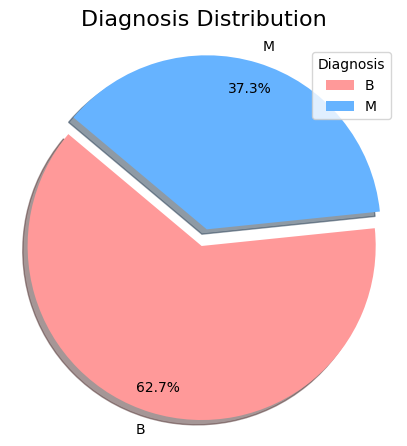

In [11]:
# Pie chart for better visualization
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)

# Create a pie chart with customizations
plt.figure(figsize=(5, 5))
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, pctdistance=0.85)

# Add a title and adjust the position
plt.title('Diagnosis Distribution', fontsize=16, y=1.03)
plt.legend(target_count.index, title="Diagnosis", loc="upper right")
plt.axis('equal')
plt.show()

In [12]:
# Digitize/Encode the binary value for target column
cancer_df['diagnosis'] = cancer_df['diagnosis'].replace({"M": 1, "B": 0})
cancer_df['diagnosis'] = cancer_df['diagnosis'].astype(int)

<Axes: xlabel='area_mean', ylabel='Count'>

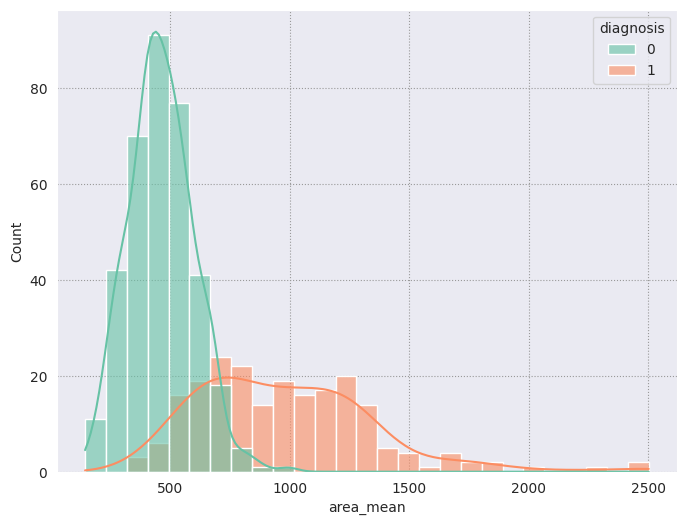

In [13]:
# Area Mean chart
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

fig = plt.figure(figsize=(8,6))
sns.histplot(data=cancer_df,x='area_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

<Axes: xlabel='radius_mean', ylabel='Count'>

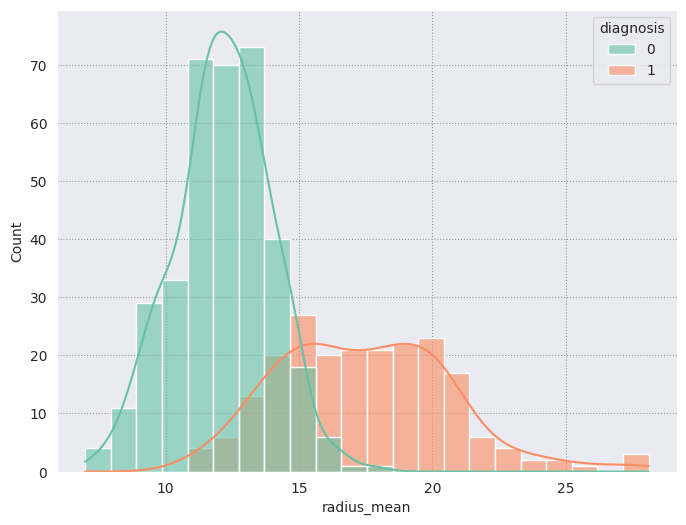

In [14]:
# Radius mean
fig = plt.figure(figsize=(8,6))
sns.histplot(data=cancer_df,x='radius_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

<Axes: xlabel='perimeter_mean', ylabel='Count'>

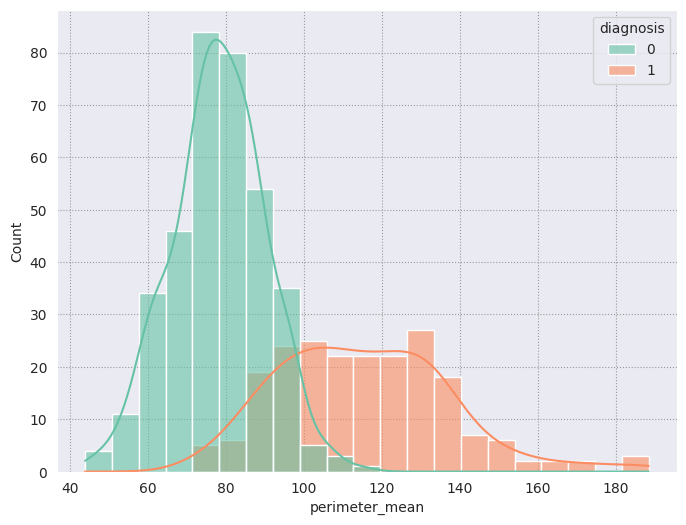

In [15]:
# Perimeter mean
fig = plt.figure(figsize=(8,6))
sns.histplot(data=cancer_df,
             x='perimeter_mean',
             hue='diagnosis',
             kde=True,
             palette='Set2',
             alpha=0.6)

### Delete column

In [16]:
# Delete unnecessary "id" col
cancer_df = cancer_df.drop('id', axis=1)

In [17]:
cancer_df.sample(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
179,0,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.0133,0.1466,...,13.63,16.15,86.7,570.7,0.1162,0.05445,0.02758,0.0399,0.1783,0.07319


### Correlation Heatmap

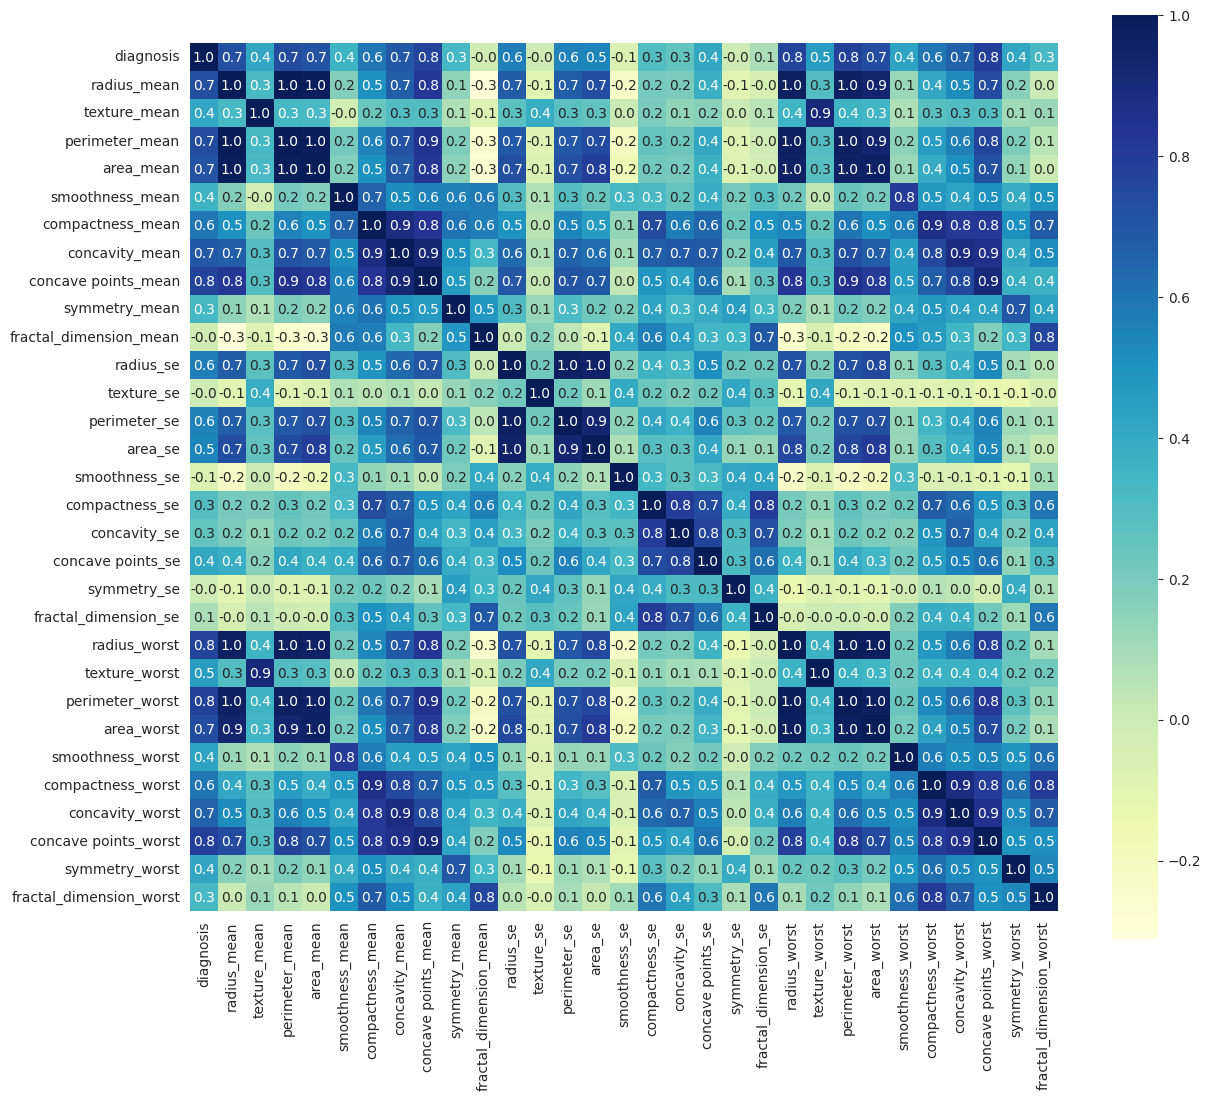

In [18]:
corr = cancer_df.corr()
fig = plt.figure(figsize=(14,12))
sns.heatmap(corr,annot=True,
            cmap='YlGnBu',
            fmt=".1f",
            square=True)
plt.show()

**Here are some assumptions I got from the Correlation Heatmap:**

  1. The target column **"diagnosis"** has some good connections with almost all feature columns.

  2. Overall, this chart shows the strong bonding fairly between all columns, and no columns stand out or having no connections.

  3. There is a strong positive correlation between the target column (**diagnosis**) and the columns **“radius_mean”, “texture_mean”, “perimeter_mean”, “area_mean”, “concavity_mean”, “concave points_mean”, “radius_worst”, “texture_worst”, “perimeter_worst”, “area_worst”, “concavity_worst”,** and **“concave points_worst”**.

  4. There is a weak negative correlation between the target column (**diagnosis**) and the columns **“smoothness_mean”, “symmetry_mean”, “fractal_dimension_mean”, “smoothness_worst”, “symmetry_worst”,** and **“fractal_dimension_worst”**.

  5. There is a moderate positive correlation between the target column (**diagnosis**) and the columns **“compactness_mean”, “compactness_worst”,** and **“radius_se”**.

In [19]:
# Only use the features with corr values greater than 0.2 for learning models

# Get value of correlation
corr_values = abs(corr["diagnosis"])

# Select highly correlated features
relevant_features = corr_values[corr_values>0.2]
relevant_features = list(relevant_features.index)
relevant_features.remove('diagnosis')

# Define target column and its variables
x = cancer_df[relevant_features]
y = cancer_df['diagnosis'].values

### Using Standard Scaler for Scaling

In [20]:
# Transform features by scaling each feature to a given range
X = StandardScaler().fit_transform(x)
X = pd.DataFrame(x)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Machine Learning Classification Models**

### Split train/test set

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

**I used StratifiedKFold to preserve the class ratio during the search**

**GridSearch was used in order to find the best parameter for this model**

In [22]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Selection of model parameters using GridSearchCV
lgr = LogisticRegression()
lgr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, .009, 0.01, .09, 1, 5, 10, 25],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}
grid_search_lgr = GridSearchCV(estimator=lgr,
                               param_grid=lgr_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc',
                               error_score=0)
grid_result_lgr = grid_search_lgr.fit(x_train, y_train)
grid_result_lgr.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 25, 'penalty': 'l2', 'solver': 'newton-cg'}

In [23]:
# Model training and scoring

lgr = lgr.set_params(**grid_result_lgr.best_params_)
lgr.fit(x_train, y_train)
y_pred_lgr = lgr.predict(x_test)

print(classification_report(y_test, y_pred_lgr))
print(confusion_matrix(y_test, y_pred_lgr))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_lgr)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_lgr)}')

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]
ROC-AUC score : 0.9828042328042329
Accuracy score : 0.9824561403508771


### Gradient Boosting Classifier

**GridSearch was used in order to find the best parameter for this model**

In [24]:
# Selection of model parameters using GridSearchCV
gbc = GradientBoostingClassifier(random_state=42)
gbc_params = {
    'n_estimators': range(20, 131, 10),
    'learning_rate': [0.01, 0.1, 0.6, 1],
    'max_features': ['auto', 'log2']
}
grid_search_gbc = GridSearchCV(estimator=gbc,
                               param_grid=gbc_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc',
                               error_score=0)

grid_result_gbc = grid_search_gbc.fit(x_train, y_train)
grid_result_gbc.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


{'learning_rate': 1, 'max_features': 'log2', 'n_estimators': 50}

In [25]:
# Model training and scoring
gbc = gbc.set_params(**grid_result_gbc.best_params_)
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_gbc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_gbc)}')

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   3]
 [  4  59]]
ROC-AUC score : 0.9543650793650793
Accuracy score : 0.9590643274853801


### K-Nearest Neighbours

**GridSearch was used in order to find the best parameter for this model**

In [26]:
# Selection of model parameters using GridSearchCV
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': range(1, 15, 2),
    'weights': ['iniform', 'distance'],
    'metric': ['euclidian', 'manhattan', 'minkowski'],
    'leaf_size': [1, 50, 5]
}

grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=knn_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc')

grid_result_knn = grid_search_knn.fit(x_train, y_train)
grid_result_knn.best_params_

Fitting 5 folds for each of 126 candidates, totalling 630 fits


{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 13,
 'weights': 'distance'}

In [27]:
# Model training and scoring
knn = knn.set_params(**grid_result_knn.best_params_)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_knn)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_knn)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   1]
 [  4  59]]
ROC-AUC score : 0.9636243386243386
Accuracy score : 0.9707602339181286


### Gaussian Naive Bayes

In [28]:
# Model training and scoring
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_nb)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_nb)}')

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

[[104   4]
 [  6  57]]
ROC-AUC score : 0.9338624338624338
Accuracy score : 0.9415204678362573


### Random Forest

**GridSearch was used in order to find the best parameter for this model**

In [29]:
# Selection of model parameters using GridSearchCV
rfc = RandomForestClassifier(random_state=42)
rfc_params = {
    'min_samples_leaf': range(1, 5),
    'max_features': ['auto', 'log2']
}

grid_search_rfc = GridSearchCV(estimator=rfc,
                               param_grid=rfc_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc')

grid_result_rfc = grid_search_rfc.fit(x_train, y_train)
grid_result_rfc.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_features': 'log2', 'min_samples_leaf': 2}

In [30]:
# Model training and scoring
rfc = rfc.set_params(**grid_result_rfc.best_params_)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(f'ROC-AUC score : {roc_auc_score(y_test, y_pred_rfc)}')
print(f'Accuracy score : {accuracy_score(y_test, y_pred_rfc)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   1]
 [  4  59]]
ROC-AUC score : 0.9636243386243386
Accuracy score : 0.9707602339181286


##**Evaluation**

### Print scores

In [31]:
# Scoring of all algorithms
print('LogisticRegression Accuracy score : %.4f' % accuracy_score(y_test, y_pred_lgr),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_lgr))
print('GradientBoostingClassifier Accuracy score : %.4f' % accuracy_score(y_test, y_pred_gbc),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_gbc))
print('KNN Accuracy score : %.4f' % accuracy_score(y_test, y_pred_knn),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_knn))
print('Naive Bayes Accuracy score : %.4f' % accuracy_score(y_test, y_pred_nb),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_nb))
print('RandomForestClassifier Accuracy score : %.4f' % accuracy_score(y_test, y_pred_rfc),
      'ROC-AUC score : %.4f' % roc_auc_score(y_test, y_pred_rfc))

LogisticRegression Accuracy score : 0.9825 ROC-AUC score : 0.9828
GradientBoostingClassifier Accuracy score : 0.9591 ROC-AUC score : 0.9544
KNN Accuracy score : 0.9708 ROC-AUC score : 0.9636
Naive Bayes Accuracy score : 0.9415 ROC-AUC score : 0.9339
RandomForestClassifier Accuracy score : 0.9708 ROC-AUC score : 0.9636


###Table structure

In [33]:
# Create a dictionary to store the scores
scores = {
    'Model': ['LogisticRegression', 'GradientBoostingClassifier', 'KNN', 'Naive Bayes', 'RandomForestClassifier'],
    'Accuracy': [accuracy_score(y_test, y_pred_lgr), accuracy_score(y_test, y_pred_gbc),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_rfc)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_lgr), roc_auc_score(y_test, y_pred_gbc),
                roc_auc_score(y_test, y_pred_knn),
                roc_auc_score(y_test, y_pred_nb), roc_auc_score(y_test, y_pred_rfc)]
}

# Create a DataFrame
scores_df = pd.DataFrame(scores)
print(scores_df)

                        Model  Accuracy   ROC-AUC
0          LogisticRegression  0.982456  0.982804
1  GradientBoostingClassifier  0.959064  0.954365
2                         KNN  0.970760  0.963624
3                 Naive Bayes  0.941520  0.933862
4      RandomForestClassifier  0.970760  0.963624


#### Create a bar chart for comparison the accuracy and ROC score of each model

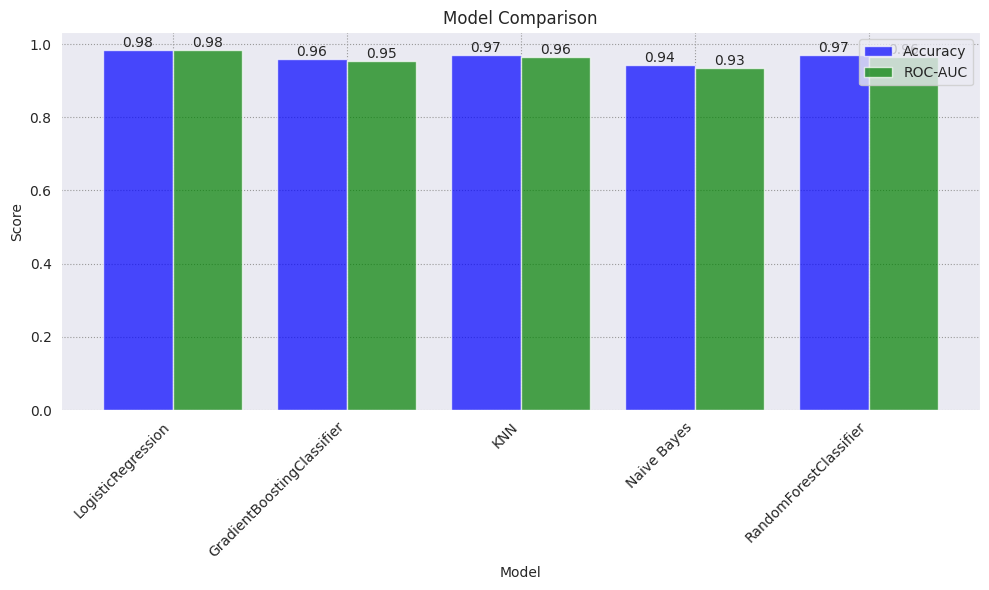

In [36]:
plt.figure(figsize=(10, 6))
num_models = len(scores_df)
bar_width = 0.4

bar_positions = np.arange(num_models)

# Create bar plots for accuracy and ROC-AUC scores
accuracy_bars = plt.bar(bar_positions, scores_df['Accuracy'], width=bar_width, label='Accuracy', color='b', alpha=0.7)
roc_auc_bars = plt.bar(bar_positions + bar_width, scores_df['ROC-AUC'], width=bar_width, label='ROC-AUC', color='g', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.xticks(bar_positions + bar_width / 2, scores_df['Model'], rotation=45, ha="right")
plt.tight_layout()

# Add values for each bar
for acc_bar, roc_auc_bar in zip(accuracy_bars, roc_auc_bars):
    plt.text(acc_bar.get_x() + acc_bar.get_width() / 2, acc_bar.get_height(),
             f'{acc_bar.get_height():.2f}', ha='center', va='bottom')
    plt.text(roc_auc_bar.get_x() + roc_auc_bar.get_width() / 2, roc_auc_bar.get_height(),
             f'{roc_auc_bar.get_height():.2f}', ha='center', va='bottom')

plt.show()

The Logistic Regression model has both the highest ROC-AUC score and the highest accuracy score. This means that it is the best performing model in terms of both its ability to distinguish between positive and negative cases and its overall accuracy.

This is a very good result, as it is not always the case that a model with high accuracy will also have high ROC-AUC score, and vice versa.

Overall, the conclusion is that the Logistic Regression model is the best performing model for breast cancer prediction in terms of both ROC-AUC score and accuracy score.

Best recommendation: **Logistic Regression**

Alternative: **K-Nearest Neighbours** and **Random Forest**